# **Análise de Vendas Farmacêuticas**

## **Sobre os dados:**

### **Venda de Medicamentos Controlados e Antimicrobianos - Medicamentos Industrializados**

Estão disponíveis nesta base de dados abertos, informações sobre a venda de medicamentos
industrializados sujeitos à escrituração no SNGPC.

### **Descrição:

Esta base de Dados Abertos disponibiliza dados públicos de venda de medicamentos sujeitos à escrituração junto ao SNGPC.

IMPORTANTE!

De acordo com a RDC 586/2021, os prazos para a transmissão dos dados de venda de medicamentos sujeitos ao controle especial foram temporariamente suspensos. Embora os estabelecimentos precisem manter seus registros internos, a partir de 5 de outubro de 2021, a transmissão de dados deixou de ser obrigatória.

Adicionalmente, para implementar solução tecnológica no sistema, a partir de 23 de dezembro de 2022 o acesso ao sistema foi interrompido de forma geral.

Com isso, a transmissão de arquivos com dados de movimentações de medicamentos e insumos sujeitos ao controle especial ficou opcional, entre 05/10/2021 e 22/12/2022, e passou a ser suspensa, a partir de 23/12/2022.


Disponível em: https://dados.gov.br/dados/conjuntos-dados/venda-de-medicamentos-controlados-e-antimicrobianos---medicamentos-industrializados

## **Objetivo: Compreender as tendências, padrões e características das vendas farmacêuticas em diferentes regiões e demografias.**

## **1. Limpeza e Pré-processamento de Dados:**

In [50]:
# Importando as bibliotecas
import pandas as pd
import glob
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Listando as amostras. Para o projeto, foi utilizado a amostragem estratificada.
csv_files = glob.glob('/content/drive/MyDrive/ciencia_de_dados/pod_academy/dados/Medicamentos industrializados/*.csv')
csv_files = [f for f in csv_files if "stratify" in f]
dfs = []

In [52]:
# Lendo os arquivos de amostras.
for file in csv_files:
    # Detecção do encoding de cada amostra. Esse procedimento se fez necessário, pois foi constatado que os arquivos possuem diferentes encoding.
    with open(file, "rb") as f:
        result = chardet.detect(f.read(200000))
    encoding = result['encoding']

    # Lendos os arquivos.
    df = pd.read_csv(file, delimiter=',', encoding=encoding)
    dfs.append(df)

In [53]:
df_all = pd.concat(dfs, ignore_index=True)

In [54]:
# Visualizando a base de dados.
df_all.sort_values('MES_VENDA')

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
2425714,2021,1.0,PE,PEDRA,CLORIDRATO DE MEMANTINA,10 MG COM REV CT BL AL PLAS TRANS X 30,2.0,CAIXA,CRM,PE,1.0,NaN,NaN,NaN,NaN
2425761,2021,1.0,RJ,MACAÉ,CARBONATO DE LÍTIO,300 MG COM REV CT BL AL PLAS TRANS X 50,63.0,CAIXA,CRM,RJ,1.0,NaN,NaN,NaN,NaN
2425703,2021,1.0,SE,ARACAJU,ACETATO DE CLOSTEBOL + SULFATO DE NEOMICINA,5 MG/G + 5 MG/G CREM VAG CT BG AL X 40 G + 8 A...,2.0,CAIXA,CRM,SE,5.0,NaN,2.0,59.0,1.0
2425744,2021,1.0,PE,AGRESTINA,CLORIDRATO DE PAROXETINA,20 MG COM REV CT BL AL PLAS TRANS X 30,2.0,CAIXA,CRM,PE,1.0,NaN,NaN,NaN,NaN
2425743,2021,1.0,PR,LONDRINA,CIPROFLOXACINO + HIDROCORTISONA MICRONIZADA,"2,0 MG + 10 MG/ML SUS OTO CT FR PLAS TRANS + G...",1.0,CAIXA,CRM,PR,5.0,NaN,1.0,76.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360936,2019,12.0,RJ,RIO DE JANEIRO,PREGABALINA,150 MG CAP DURA CT BL AL PLAS PVC/PCTFE TRANS ...,1.0,CAIXA,CRM,RJ,3.0,NaN,2.0,40.0,1.0
360937,2019,12.0,GO,ALEXÂNIA,CLORDIAZEPÓXIDO + CLORIDRATO DE AMITRIPTILINA,"12,5 MG + 5,0 MG CAP GEL DURA CT BL AL PLAS TR...",10.0,CAIXA,CRM,GO,2.0,NaN,NaN,NaN,NaN
360938,2019,12.0,SP,SÃO PAULO,LEVOFLOXACINO HEMIIDRATADO,750 MG COM REV CT BL AL PLAS INC X 7,25.0,CAIXA,CRM,SP,5.0,NaN,1.0,69.0,1.0
360939,2019,12.0,SP,ARARAQUARA,CLIOQUINOL + SULFATO DE GENTAMICINA + TOLNAFTA...,"0,50 MG/G + 1MG/G + 10 MG/G + 10 MG/G CREM DER...",1.0,CAIXA,CRM,SP,5.0,NaN,2.0,41.0,1.0


In [55]:
# Check das dimensões do dataframe de dados.
df_all.shape

(4328482, 15)

In [56]:
# Check dos metadados básicos.
# Gerando um dataframe de metadados.
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

generate_metadata(df_all)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,ANO_VENDA,int64,0,0.00,3
1,MES_VENDA,float64,0,0.00,12
2,QTD_VENDIDA,float64,0,0.00,1638
3,TIPO_RECEITUARIO,float64,0,0.00,5
4,SEXO,float64,1217931,28.14,2
5,IDADE,float64,1217931,28.14,893
6,UNIDADE_IDADE,float64,1217931,28.14,2
7,UF_VENDA,object,0,0.00,27
8,MUNICIPIO_VENDA,object,0,0.00,4911
9,PRINCIPIO_ATIVO,object,8549,0.20,756


In [57]:
# Check da estatística descritiva para variáveis numéricas.
df_all.describe()

,ANO_VENDA,MES_VENDA,QTD_VENDIDA,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
count,4.328482e+06,4.328482e+06,4.328482e+06,4.328482e+06,3.110551e+06,3.110551e+06,3.110551e+06
mean,2.020352e+03,6.646821e+00,5.241194e+00,3.623809e+00,1.557574e+00,4.200043e+01,1.013614e+00
std,6.344600e-01,3.505005e+00,7.916580e+02,1.817549e+00,4.966742e-01,3.968809e+01,1.158807e-01
min,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.020000e+03,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.600000e+01,1.000000e+00
50%,2.020000e+03,7.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,4.000000e+01,1.000000e+00
75%,2.021000e+03,1.000000e+01,3.000000e+00,5.000000e+00,2.000000e+00,5.600000e+01,1.000000e+00
max,2.021000e+03,1.200000e+01,1.440897e+06,5.000000e+00,2.000000e+00,9.990000e+02,2.000000e+00


In [58]:
# Tratamento de nulo da variável IDADE.
# 1° Conversão das idades que estão em meses para ano.
# 2° Considerar a idade média para preecher os campos nulos.
# 3° Criar a variável IDADE_FIX com os dados convertidos para ano com os nulos preenchidos.

# Conversão das idades que estão em meses para ano.
df_all['IDADE_ANOS'] = df_all.apply(lambda row: round(row['IDADE']/12) if row['UNIDADE_IDADE'] == 2 else row['IDADE'], axis=1)

In [59]:
# Preenchenco os valores nulos da variável IDADE_ANOS com a média.
df_all['IDADE_FIX'] = df_all['IDADE_ANOS'].fillna(df_all['IDADE_ANOS'].mean())

In [60]:
# Foi identificado outliers na variável IDADE.
# Como solução, se o volume for pequeno, será imputado a média das idades.

# Check do volume de registros com idade acima de 100 anos.
df_all['IDADE_ANOS'][df_all['IDADE_ANOS']>100.0].value_counts().sort_index().head(30)

,count
IDADE_ANOS,
101.0,253
102.0,201
103.0,163
104.0,108
105.0,76
106.0,45
107.0,36
108.0,45
109.0,31


In [61]:
# Com base em dados públicos, a quantidade de brasileiros acima dos 100 anos gira em torno de 37 mil, por isso será considerada a idade máxima de 100 anos.
# Para os casos de idade acima dos 100 anos, será considerada a idade média também.
idade_media = df_all.loc[df_all['IDADE_ANOS']<=100.0, 'IDADE_ANOS'].mean().round()
df_all['IDADE_FIX'] = df_all['IDADE_ANOS'].fillna(idade_media)
df_all['IDADE_FIX'] = df_all.apply(lambda row: idade_media if row['IDADE_FIX'] > 100.0 else row['IDADE_FIX'], axis=1)

In [62]:
# Tratamento de nulo da variável CID10.
# A variável CID10 será dropada, pois contem mais de 90% dos seus dados como nulos.
df_all = df_all.drop("CID10",axis=1)

In [63]:
# Tratamento de nulo da variável SEXO.
# Considerar a moda para preecher os campos nulos.
df_all['SEXO_FIX'] = df_all['SEXO'].fillna(df_all['SEXO'].mode()[0])

In [64]:
# Tratamento de nulo da variável PRINCIPIO_ATIVO.
# Considerar a moda para preecher os campos nulos.
df_all['PRINCIPIO_ATIVO_FIX'] = df_all['PRINCIPIO_ATIVO'].fillna(df_all['PRINCIPIO_ATIVO'].mode()[0])

In [65]:
# Construção de uma coluna de competência.
df_all['CMPT'] = (df_all['ANO_VENDA'].astype(str) + df_all['MES_VENDA'].astype(int).astype(str).str.zfill(2)).astype(int)

## **2. Análise Exploratória de Dados (EDA):**
**Tendências de Vendas:**
- **Vendas mensais: Identificar se há meses com vendas excepcionalmente altas ou baixas.**

In [66]:
# Quantidade vendida por competência (ano e mês).
df_all.groupby('CMPT')['QTD_VENDIDA'].sum().reset_index().sort_values(by='QTD_VENDIDA',ascending=False)

,CMPT,QTD_VENDIDA
23,202110,2291074.0
11,202010,1617722.0
19,202106,927193.0
13,202012,919436.0
22,202109,909282.0
21,202108,906188.0
20,202107,890151.0
18,202105,883563.0
4,202003,872311.0
7,202006,869428.0


***Análises:***

*Os meses com as maiores quantidades de vendas de medicamentos são: 10/2021, 10/2020, 06/2021 e 12/2020.*

*O mês com menor quantidade de vendas é 11/2021, aparentemente os dados estão incompletos devido a não obrigadoriedade de fornecimento dos dados.*

- **Análise por estado (UF_VENDA): Quais estados têm o maior número de vendas? Existem padrões regionais?**

In [67]:
# Quantidade vendida média de mensal por UF.
df_all_qtd_uf_cmpt = df_all.groupby(['UF_VENDA','CMPT'])['QTD_VENDIDA'].sum().reset_index().sort_values(by='QTD_VENDIDA',ascending=False)
df_all_qtd_uf_cmpt.groupby('UF_VENDA')['QTD_VENDIDA'].mean().reset_index().sort_values(by='QTD_VENDIDA', ascending=False)

,UF_VENDA,QTD_VENDIDA
25,SP,194496.40
22,RS,161345.92
10,MG,126014.88
18,RJ,66880.76
17,PR,52513.88
23,SC,39474.44
8,GO,36246.32
4,BA,31518.92
15,PE,28109.92
5,CE,19928.40


***Análises:***

*Os estados que concentram as maiores quantidades de vendas médio por mês são SP e MG, que são estados da região Sudeste, sendo a região predominante entre os quantro estados com maiores vendas, nessa região está localizada as maiores concentrações de pessoas do pais.*

**Produtos Mais Vendidos:**
 - **Baseado no PRINCIPIO_ATIVO: Quais são os medicamentos mais populares?**

In [68]:
# Quantidade vendida média de mensal por PRINCIPIO_ATIVO.
df_all_qtd_por_prin_ativ_e_cmpt = df_all.groupby(['PRINCIPIO_ATIVO','CMPT'])['QTD_VENDIDA'].sum().reset_index()
df_all_qtd_por_prin_ativ_e_cmpt.groupby('PRINCIPIO_ATIVO')['QTD_VENDIDA'].mean().reset_index().sort_values(by='QTD_VENDIDA', ascending=False)

,PRINCIPIO_ATIVO,QTD_VENDIDA
501,HEMIFUMARATO DE QUETIAPINA,81282.84
214,CLONAZEPAM,51355.32
54,AMOXICILINA + CLAVULANATO DE POTÁSSIO,38847.20
503,HEMITARTARATO DE ZOLPIDEM,35028.92
603,OXALATO DE ESCITALOPRAM,34211.84
...,...,...
728,ÁCIDO ACETILSALICÍLICO + CAFEÍNA + HIDRÓXIDO D...,1.00
731,ÁCIDO AMINOBUTÍRICO + ÁCIDO GLUTÂMICO + CIANOC...,1.00
732,ÁCIDO ASCÓRBICO + COLECALCIFEROL + GLYCYRRHIZA...,1.00
734,ÁCIDO AZELAICO,1.00


***Análises:***

*Entre os medicamentos mais populares ou mais vendidos estão o HEMIFUMARATO DE QUETIAPINA	que é um tipo de antidepressivo, e o CLONAZEPAM	que é um tipo de analgézico/ tranquilizante.*

- **Baseado na DESCRICAO_APRESENTACAO: Quais apresentações ou dosagens são mais vendidas?**

In [69]:
# Quantidade vendida média de mensal por DESCRICAO_APRESENTACAO.
df_all_desc_apre_por_cmpt = df_all.groupby(['DESCRICAO_APRESENTACAO','CMPT'])['QTD_VENDIDA'].sum().reset_index()
df_all_desc_apre_por_cmpt.groupby('DESCRICAO_APRESENTACAO')['QTD_VENDIDA'].mean().reset_index().sort_values(by='QTD_VENDIDA', ascending=False)

,DESCRICAO_APRESENTACAO,QTD_VENDIDA
3448,50 MG COM REV LIB PROL CT BL PLAS TRANS AL X 30,59692.92
4465,875 MG + 125 MG COM REV CT BL AL/ AL X 14,33245.08
1644,2 MG COM CT BL AL PLAS TRANS X 30,14550.04
822,10 MG COM REV CT BL AL PLAS TRANS X 30,12558.88
3399,50 MG COM REV CT BL AL PLAS TRANS X 30,10721.84
...,...,...
2751,"301,5 MG COM SUB-LING CT FR PLAS OPC X 50",1.00
2738,300 MG COM REV LIB PROL CT FR PLAS OPC X 90,1.00
432,1 G COM REV CT BL AL PLAS PVC OPC X 50 (EMB FRAC),1.00
423,"1 G + 0,2 G PO P/ SOL INJ IV CX 50 FA VD INC X...",1.00


**Demografia dos Consumidores:**

 - **Distribuição de idade dos compradores.**

In [70]:
# Quantidade média de indivíduos por idade.
df_all_qtd_por_idade_e_cmpt = df_all.groupby(['IDADE_FIX','CMPT'])['IDADE_FIX'].count().reset_index(name='QTD')
df_all_qtd_por_idade_e_cmpt.groupby('IDADE_FIX')['QTD'].mean().reset_index().sort_values(by='QTD', ascending=False)

,IDADE_FIX,QTD
40,40.0,52056.08
30,30.0,3164.56
35,35.0,3039.56
45,45.0,2977.48
25,25.0,2787.32
...,...,...
96,96.0,54.32
97,97.0,36.80
98,98.0,32.48
99,99.0,24.36


- **Distribuição de gênero dos compradores.**

In [71]:
# Quantidade média de indivíduos por sexo.
df_all_qtd_por_sexo_e_cmpt = df_all.groupby(['SEXO_FIX','CMPT'])['SEXO_FIX'].count().reset_index(name='QTD')
df_all_qtd_por_sexo_e_cmpt.groupby('SEXO_FIX')['QTD'].mean().reset_index().sort_values(by='QTD', ascending=False)

,SEXO_FIX,QTD
1,2.0,118091.76
0,1.0,55047.52


**Correlações:**
- **Existe correlação entre o tipo de medicamento e a idade do comprador?**

In [72]:
corr_idade_rec = df_all["IDADE_FIX"].corr(df_all["TIPO_RECEITUARIO"])
print(corr_idade_rec)

-0.03263148954268757


*Não existe correlação entre o tipo de receituário e a idade.*

- **Existe uma correlação entre o gênero do comprador e o tipo de medicamento?**

In [73]:
corr_sexo_rec = df_all["SEXO_FIX"].corr(df_all["TIPO_RECEITUARIO"])
print(corr_sexo_rec)

-0.31402759779304834


*Existe alguma correlação entre o tipo de receituário e o gênero.*

## **3. Visualização de Dados:**
- **Gráficos de barras para mostrar as vendas por estado, por medicamento e por gênero.**

In [74]:
df_all["MES_VENDA"] = df_all["MES_VENDA"].astype(int)

In [75]:
df_all_sum_vendas_by_ano_mes_uf = df_all.groupby(["CMPT","UF_VENDA"])["QTD_VENDIDA"].sum().reset_index()
df_all_avg_vendas_by_ano_uf = df_all_sum_vendas_by_ano_mes_uf.groupby(["UF_VENDA"])["QTD_VENDIDA"].mean().reset_index().sort_values(by="QTD_VENDIDA", ascending=False)

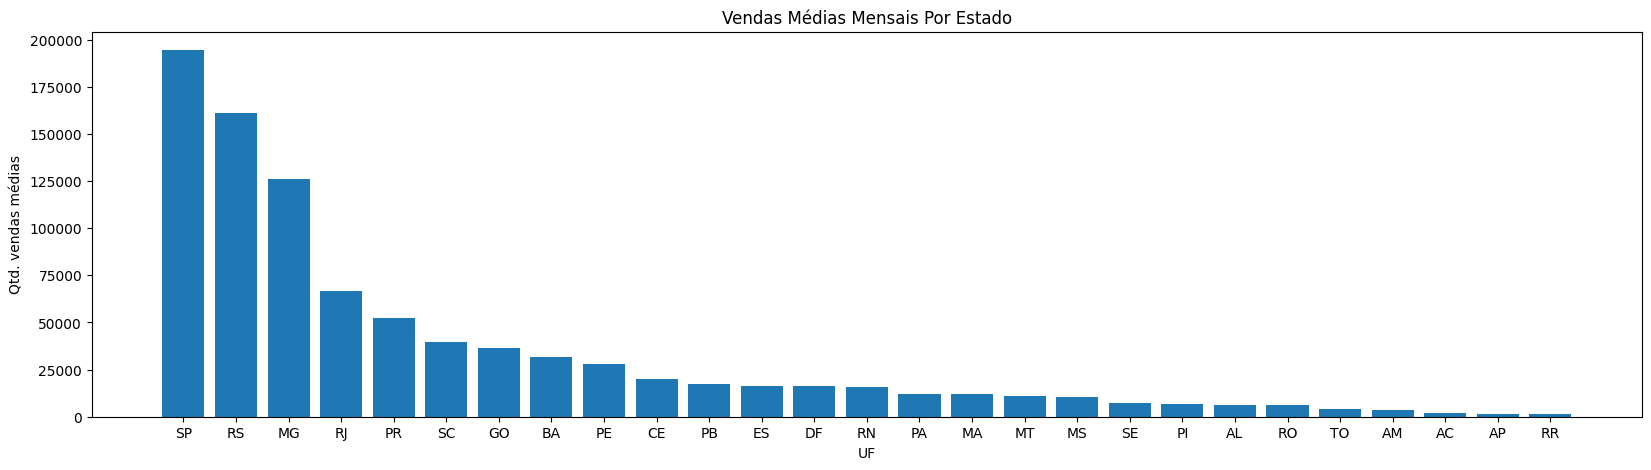

In [76]:
plt.figure(figsize=(20,5))
plt.bar(df_all_avg_vendas_by_ano_uf["UF_VENDA"], df_all_avg_vendas_by_ano_uf["QTD_VENDIDA"])
plt.xlabel("UF")
plt.ylabel("Qtd. vendas médias")
plt.title("Vendas Médias Mensais Por Estado")
plt.show()

In [77]:
df_all_sum_vendas_by_princ_ativo = df_all.groupby(["CMPT","PRINCIPIO_ATIVO_FIX"])["QTD_VENDIDA"].sum().reset_index()
df_all_avg_vendas_by_princ_ativo = df_all_sum_vendas_by_princ_ativo.groupby(["PRINCIPIO_ATIVO_FIX"])["QTD_VENDIDA"].mean().reset_index().sort_values(by="QTD_VENDIDA", ascending=False)
df_all_avg_vendas_by_princ_ativo = df_all_avg_vendas_by_princ_ativo[df_all_avg_vendas_by_princ_ativo["QTD_VENDIDA"] >= 10000]

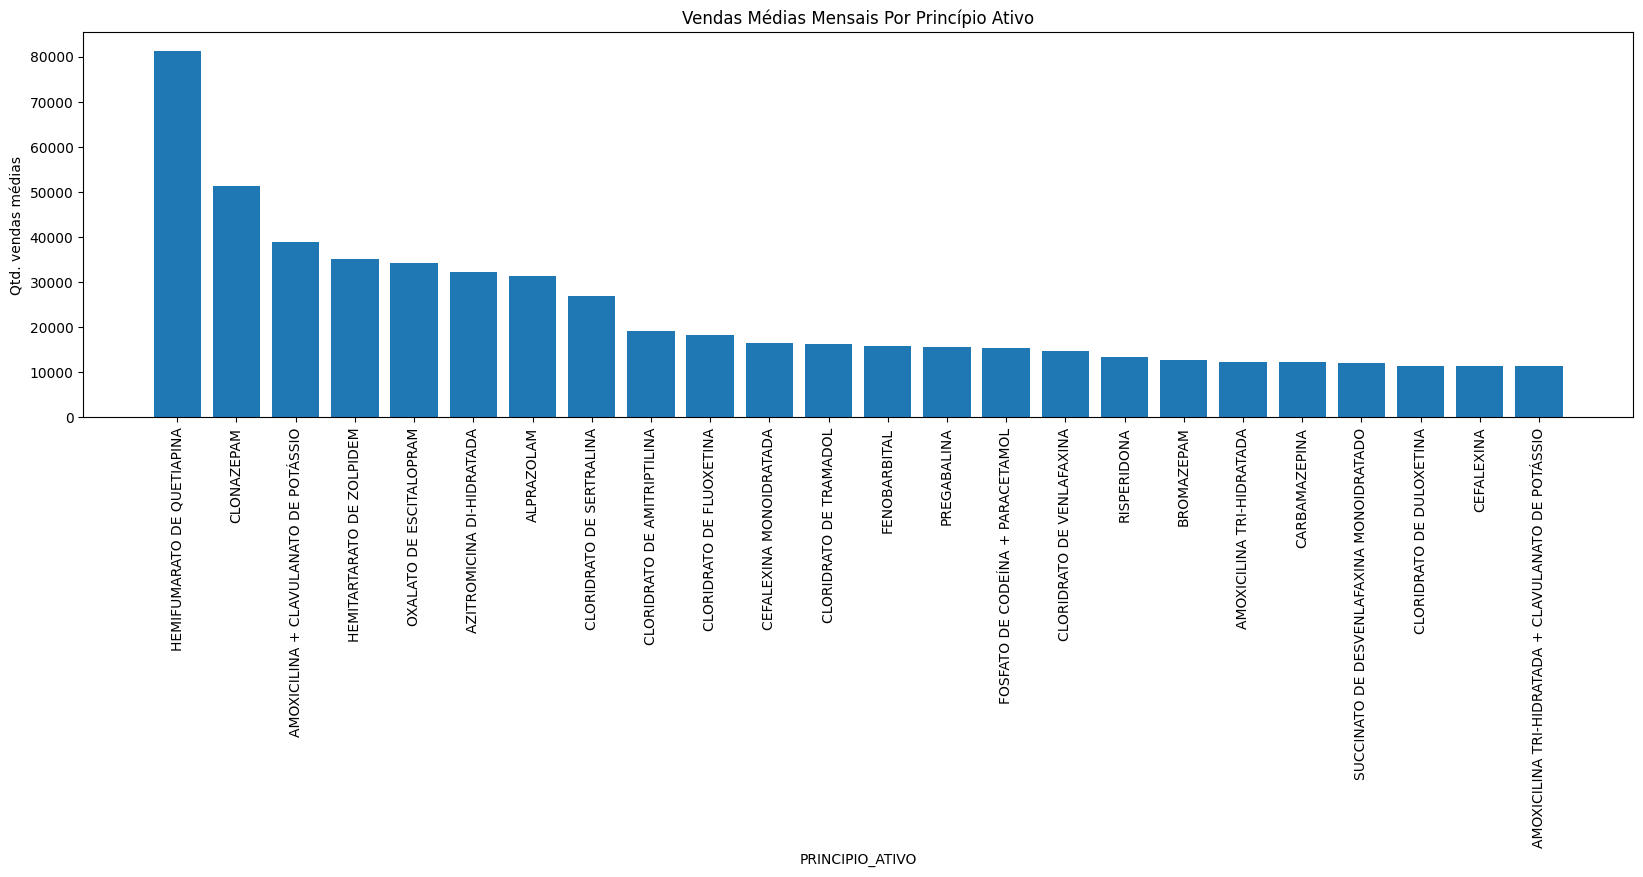

In [78]:
plt.figure(figsize=(20,5))
plt.bar(df_all_avg_vendas_by_princ_ativo["PRINCIPIO_ATIVO_FIX"], df_all_avg_vendas_by_princ_ativo["QTD_VENDIDA"])
plt.xticks(rotation=90)
plt.xlabel("PRINCIPIO_ATIVO")
plt.ylabel("Qtd. vendas médias")
plt.title("Vendas Médias Mensais Por Princípio Ativo")
plt.show()

In [79]:
df_all_sum_vendas_by_sexo = df_all.groupby(["CMPT","SEXO_FIX"])["QTD_VENDIDA"].sum().reset_index()
df_all_avg_vendas_by_sexo = df_all_sum_vendas_by_sexo.groupby(["SEXO_FIX"])["QTD_VENDIDA"].mean().reset_index().sort_values(by="QTD_VENDIDA", ascending=False)

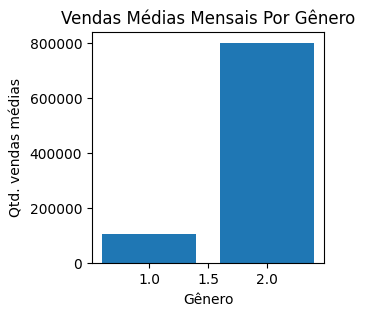

In [80]:
plt.figure(figsize=(3,3))
plt.bar(df_all_avg_vendas_by_sexo["SEXO_FIX"], df_all_avg_vendas_by_sexo["QTD_VENDIDA"])
plt.xlabel("Gênero")
plt.ylabel("Qtd. vendas médias")
plt.title("Vendas Médias Mensais Por Gênero")
plt.show()

- **Histogramas para distribuição de idade.**

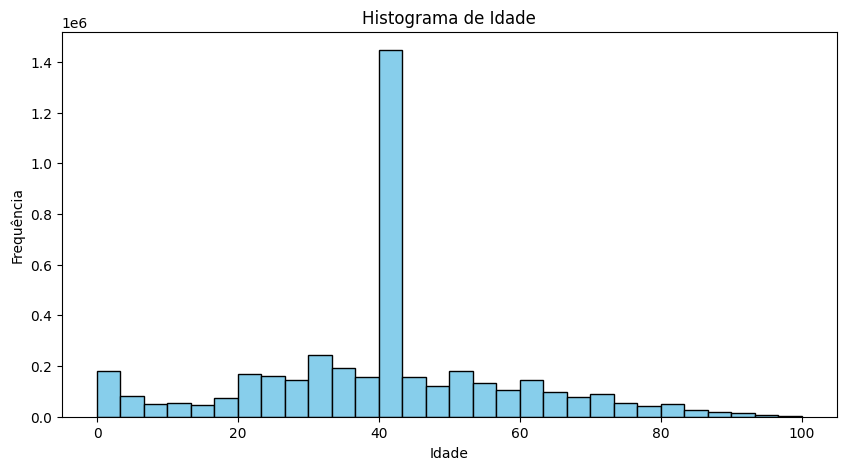

In [81]:
plt.figure(figsize=(10,5))
plt.hist(df_all["IDADE_FIX"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histograma de Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

- **Heatmaps para correlações.**

In [82]:
corr = df_all[["CMPT","TIPO_RECEITUARIO","SEXO_FIX","IDADE_FIX","QTD_VENDIDA","UF_VENDA","CONSELHO_PRESCRITOR","UNIDADE_MEDIDA","DESCRICAO_APRESENTACAO","PRINCIPIO_ATIVO_FIX","MUNICIPIO_VENDA","UF_CONSELHO_PRESCRITOR"]].corr(numeric_only=True)

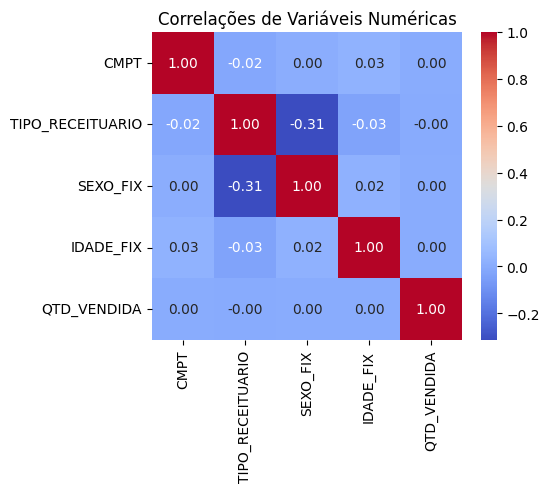

In [83]:
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlações de Variáveis Numéricas")
plt.show()

- **Gráficos de linha para tendências de vendas ao longo dos meses.**

In [84]:
# Quantidade de vendas por ano e mês.
df_all_vendas_by_ano_mes = df_all.groupby(["ANO_VENDA","MES_VENDA"])["QTD_VENDIDA"].sum().reset_index().sort_values(by=["ANO_VENDA","MES_VENDA"], ascending=True)
df_all_vendas_by_ano_mes

,ANO_VENDA,MES_VENDA,QTD_VENDIDA
0,2019,11,799303.0
1,2019,12,855514.0
2,2020,1,815036.0
3,2020,2,753943.0
4,2020,3,872311.0
5,2020,4,696138.0
6,2020,5,784377.0
7,2020,6,869428.0
8,2020,7,856068.0
9,2020,8,838822.0


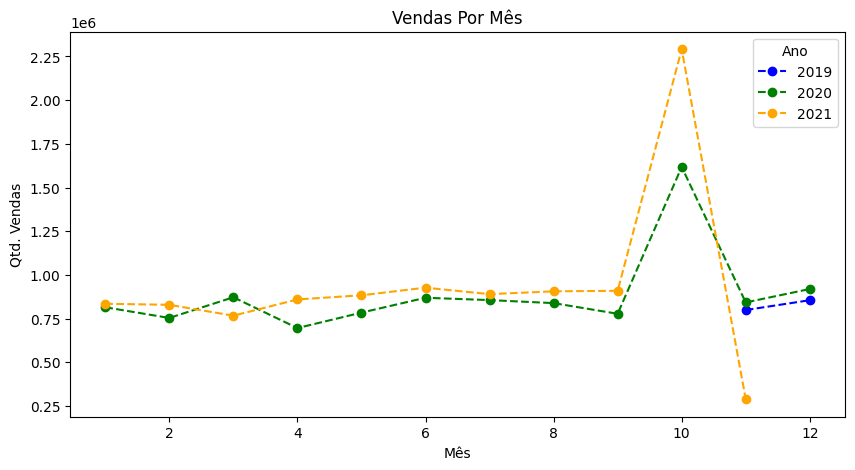

In [85]:
colors = {2019: "blue", 2020: "green", 2021: "orange"}
plt.figure(figsize=(10,5))

for ano, group in df_all_vendas_by_ano_mes.groupby("ANO_VENDA"):
  plt.plot(group["MES_VENDA"], group["QTD_VENDIDA"], marker="o", linestyle="--", color=colors[ano], label=str(ano))
plt.title("Vendas Por Mês")
plt.xlabel("Mês")
plt.ylabel("Qtd. Vendas")
plt.legend(title="Ano")
plt.show()

## **4. Insights e Recomendações**

***Insights a partir dos dados:***

**1. Crescimento contínuo nas vendas (2019–2021):**

- Pode refletir tanto aumento de diagnósticos (maior procura por saúde mental) quanto maior prescrição/consumo.

- O período coincide com a pandemia de COVID-19, quando houve um aumento expressivo nos casos de ansiedade e depressão.

**2. Perfil do comprador (mulheres, ~41 anos):**

- Indica um grupo-alvo predominante (mulheres em idade adulta média).

- Pode estar relacionado a fatores sociais (dupla jornada, sobrecarga emocional, menopausa inicial, etc.).

**3. Tipos de medicamentos (antidepressivos e tranquilizantes):**

- Reforça a tendência de maior demanda por tratamentos de saúde mental.

- Sugere que farmácias são um ponto de suporte crítico para pacientes em tratamento psicológico/psiquiátrico.

**4. Concentração regional (Sudeste com maior média mensal):**

- Pode estar ligada à maior densidade populacional, maior número de farmácias e também maior acesso a consultas médicas.

- Importante notar se o consumo é proporcional à população ou se há excesso em relação a outras regiões (indicando possíveis desigualdades no acesso a tratamento).

- **Formule recomendações para farmácias ou empresas farmacêuticas com base nas tendências observadas.**

***Recomendações:***

**1. Atenção especial à saúde mental do cliente:**

- Treinar equipe para acolher e orientar pacientes que compram antidepressivos/tranquilizantes.

- Disponibilizar informações claras sobre uso correto e possíveis efeitos colaterais.

**Acompanhamento e adesão ao tratamento:**

- Criar programas de lembrete ou benefícios para pacientes de uso contínuo, ajudando na regularidade do tratamento.

- Oferecer suporte em relação a interações medicamentosas.

**3. Educação em saúde e prevenção:**

- Promover campanhas informativas sobre bem-estar mental, autocuidado e busca de acompanhamento médico.

- Incentivar hábitos saudáveis (sono, atividade física, alimentação), que podem complementar o tratamento.

**4. Atenção ao perfil de clientes (mulheres de 40+ anos):**

- Oferecer programas de fidelização e atendimento mais personalizado para esse público.

- Criar espaços de escuta e orientação focados nesse grupo.

**5. Regionalização das estratégias:**

- No Sudeste, reforçar estoques e campanhas, dado o maior consumo.

- Em outras regiões, investigar se há barreiras de acesso e como a farmácia pode atuar (teleatendimento, entrega, parcerias com clínicas locais).

**6. Ética e responsabilidade:**

- Garantir que a dispensa de medicamentos controlados siga rigorosamente as normas.

- Evitar indução ao consumo excessivo, atuando como parceiro da saúde pública.